# Limpeza e Tratamento de Dados
-----
DataSet = Churn.csv
* Análise de retotividade de clientes

In [1]:
getwd()

[1] "C:/Users/Mariot/Documents/PythonFundamentos/Tratamento de dados em R e Python/R"

In [123]:
# Strings vazias exportar como 'na', Strings como Fatores
dados = read.csv("datasets/Churn.csv", sep=";", na.strings="", stringsAsFactors=T)

In [124]:
head(dados)

X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


In [125]:
summary(dados)

       X0               X1         X2              X3            X4       
 Min.   :   1.0   Min.   :376.0   PR:257   F        :  2   Min.   :-20.0  
 1st Qu.: 251.5   1st Qu.:580.0   RP:  1   Fem      :  1   1st Qu.: 32.0  
 Median : 501.0   Median :653.0   RS:478   Feminino :461   Median : 37.0  
 Mean   : 500.9   Mean   :648.6   SC:258   M        :  6   Mean   : 38.9  
 3rd Qu.: 750.5   3rd Qu.:721.0   SP:  4   Masculino:521   3rd Qu.: 44.0  
 Max.   :1000.0   Max.   :850.0   TD:  1   NA's     :  8   Max.   :140.0  
                                                                          
      X4.1              X6                 X7              X8        
 Min.   : 0.000   Min.   :       0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:       0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 8958835   Median :1.000   Median :1.0000  
 Mean   : 5.069   Mean   : 7164928   Mean   :1.527   Mean   :0.7027  
 3rd Qu.: 8.000   3rd Qu.:12586844   3rd Qu.:2.000

In [126]:
# Renomeando as colunas da tabela
colnames(dados)=c("id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu")
head(dados)

id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0
6,645,SC,Masculino,44,8,11375578,2,1,0,14975671,1


In [127]:
colnames(dados)

[1] "id"             "Score"          "Estado"         "Genero"        
 [5] "Idade"          "Patrimonio"     "Saldo"          "Produtos"      
 [9] "TemCartCredito" "Ativo"          "Salario"        "Saiu"

# Exploração dos dados
---
1. Dados categóricos: Estado e Gênero
2. Dados quantitativos: demais

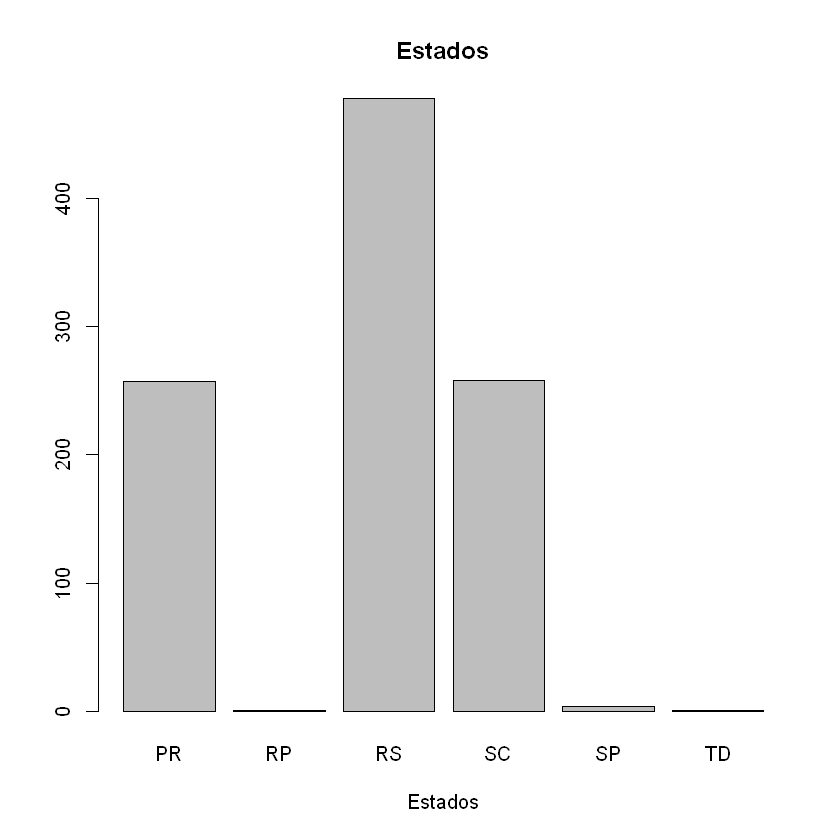

In [128]:
# 1. Estado
counts = table(dados$Estado)
barplot(counts, main='Estados', xlab='Estados')
# Possivelmente existam dados incorretos em RP, SP e TD

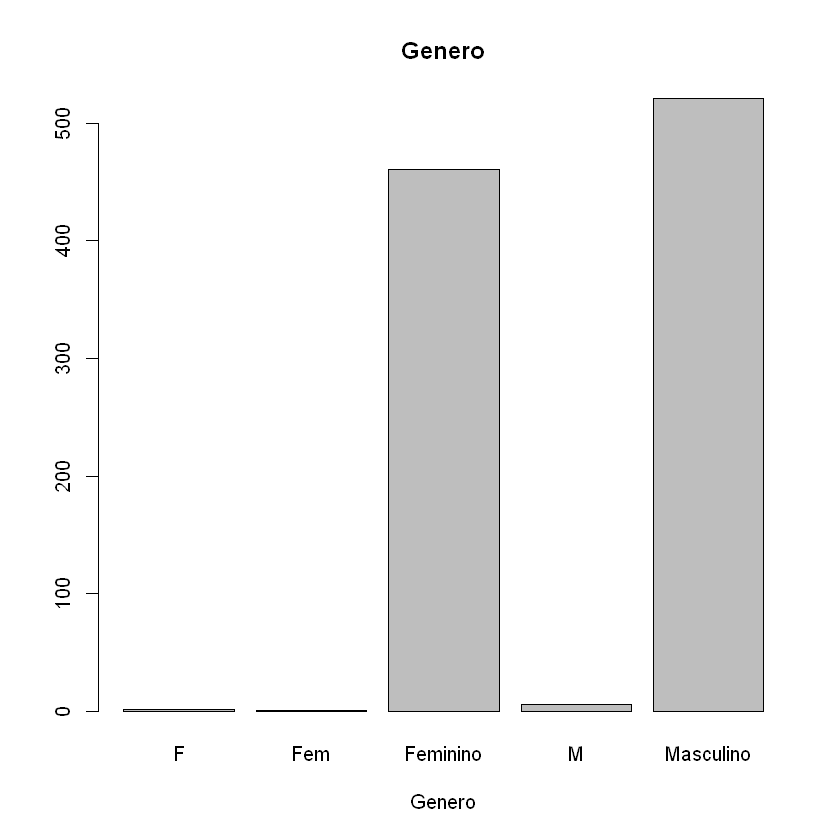

In [129]:
# 1. Gênero
count = table(dados$Genero)
barplot(count,main='Genero', xlab='Genero')
# Assim como na variável Estado, em Genero existem dados incorretos em F, Fem e M
## Provavelmente F e Fem sejam das mesmas categorias

In [130]:
# 2. Dados numéricos
## Score
summary(dados$Score)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  376.0   580.0   653.0   648.6   721.0   850.0 

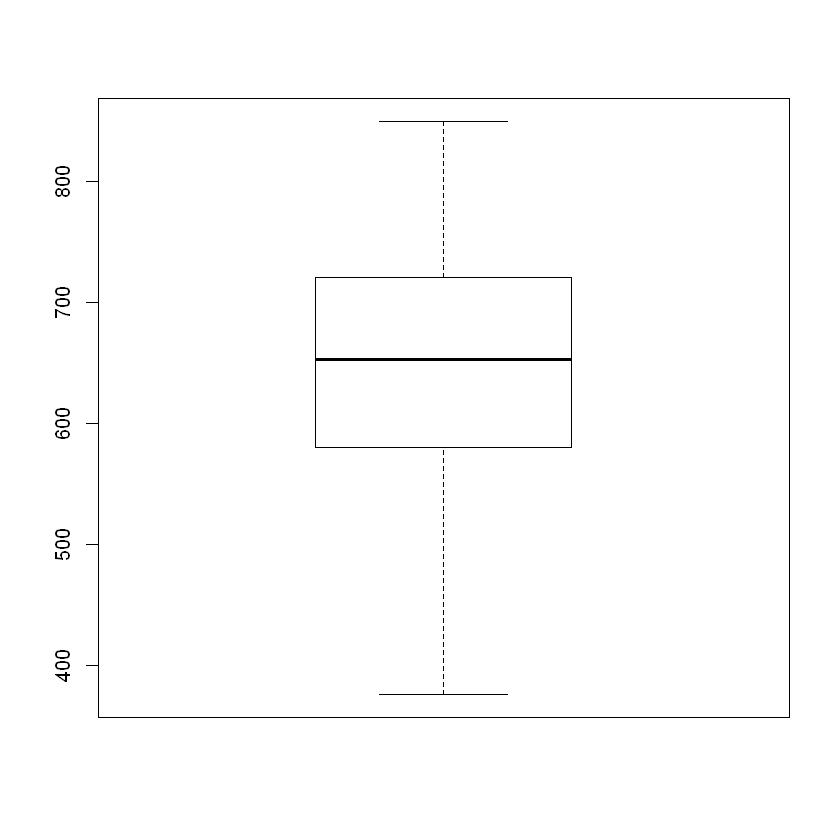

In [131]:
boxplot(dados$Score)

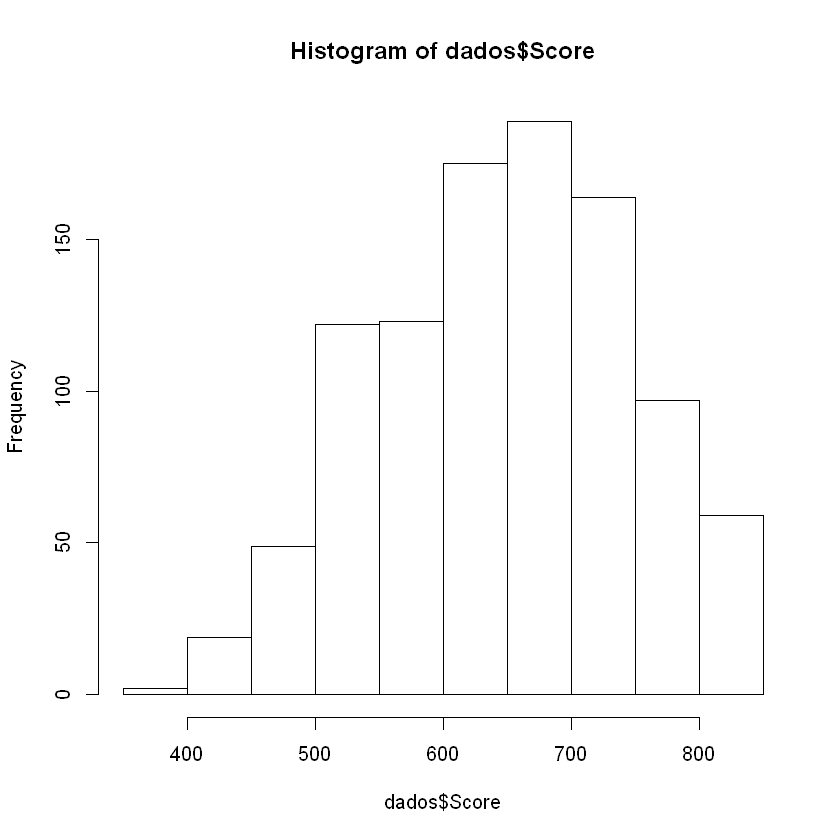

In [132]:
hist(dados$Score)

In [133]:
## Idade
summary(dados$Idade)
## Apresenta uma anomalia no min e no max

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -20.0    32.0    37.0    38.9    44.0   140.0 

In [134]:
## Saldo
summary(dados$Saldo)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0  8958835  7164928 12586844 21177431 

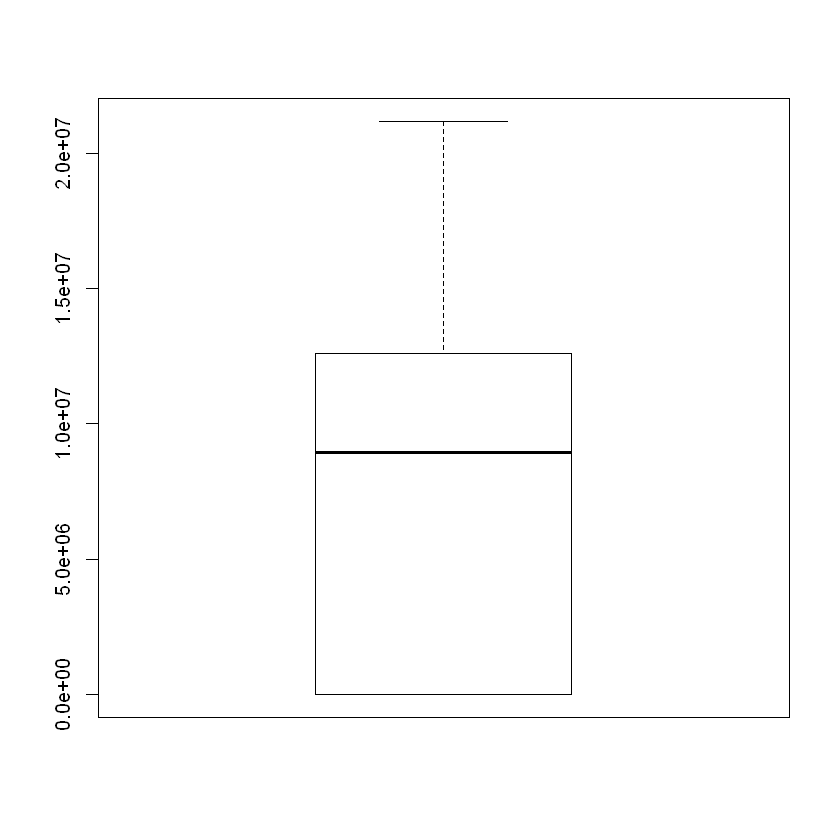

In [135]:
boxplot(dados$Saldo)

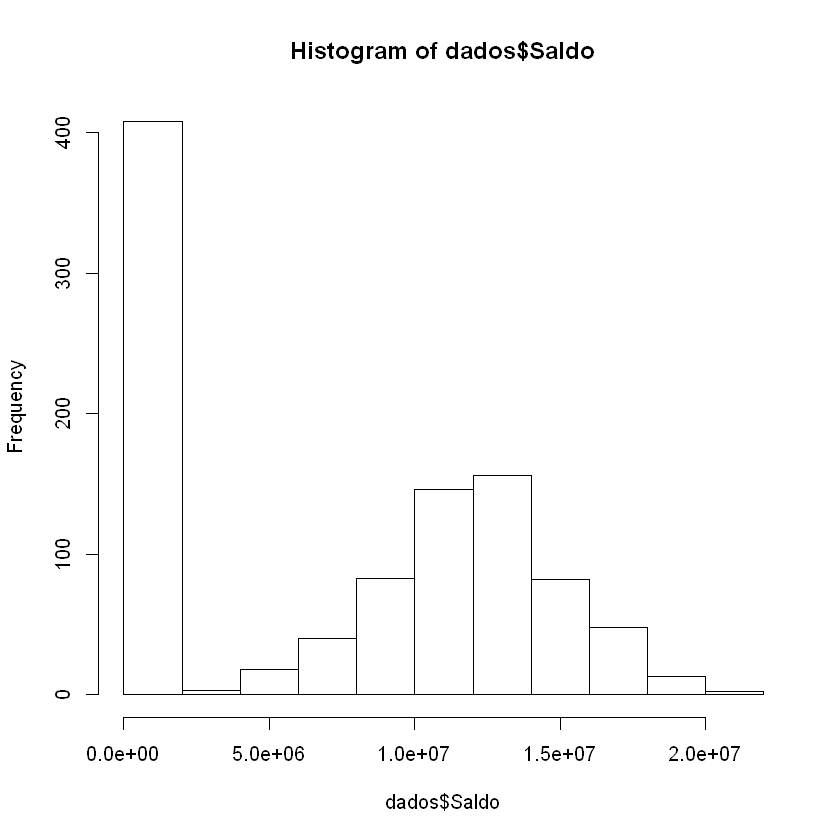

In [136]:
hist(dados$Saldo)

In [137]:
## Salário
summary(dados$Salario)
### Apresenta 7 valores Nas que devem ser tratados 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.029e+06 8.703e+06 3.529e+07 1.405e+07 1.193e+10         7 

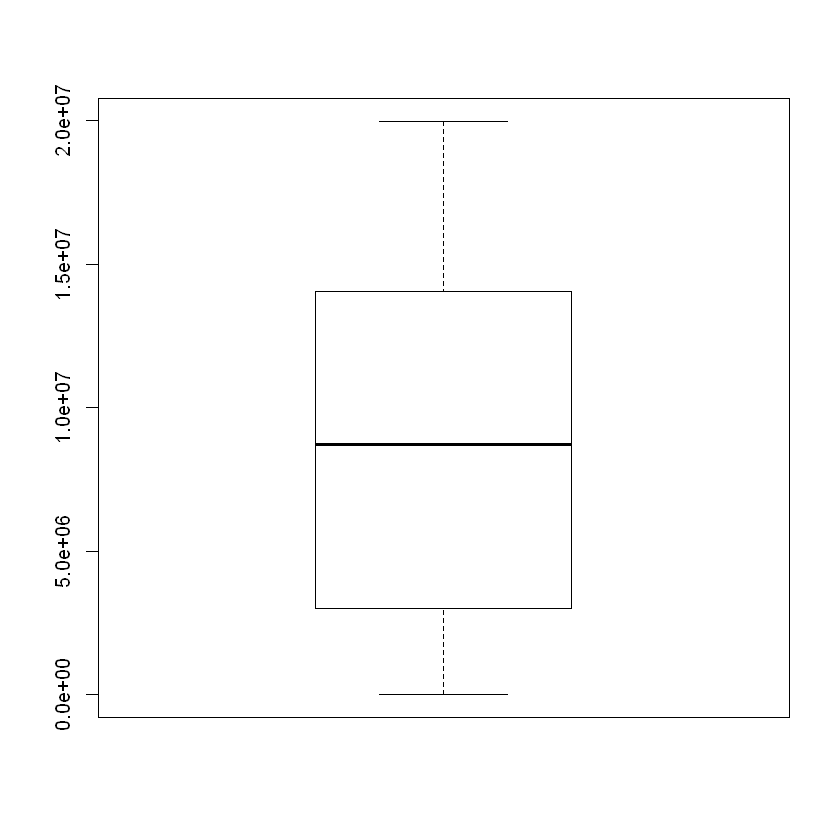

In [138]:
boxplot(dados$Salario, outline=F)

# Processo de transformação dos dados com problemas
---

In [139]:
# Valores faltantes
dados[!complete.cases(dados),]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
18,18,549,SC,Feminino,24,9,0,2,1,1,NA,0
53,53,788,RS,Feminino,33,5,0,2,0,0,NA,0
65,65,603,PR,NA,26,4,10916637,1,1,1,9284067,0
85,86,493,RS,NA,46,4,0,2,1,0,190766,0
180,181,754,PR,Feminino,55,3,16160881,1,1,0,NA,1
214,215,676,RS,NA,34,1,6309501,1,1,1,4064581,0
297,298,714,RS,NA,31,4,12516926,1,1,1,10663689,0
331,332,656,RS,Masculino,50,7,0,2,0,1,NA,0
371,372,801,SC,NA,42,4,14194767,1,1,1,1059829,0
427,428,492,PR,Masculino,39,10,12457665,2,1,0,NA,0


In [140]:
# Salários
summary(dados$Salario)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
9.677e+03 3.029e+06 8.703e+06 3.529e+07 1.405e+07 1.193e+10         7 

In [141]:
# Extraindo a mediana dos Salários/sem Na
m = median(dados$Salario, na.rm = T)
m

[1] 8703250

In [142]:
# Substituindo os valores Na em Salario com a mediana
dados[is.na(dados$Salario),]$Salario = m

In [143]:
dados[!complete.cases(dados$Salario),]

id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [144]:
# Falta de padronização na variável Genero
unique(dados$Genero)

[1] Feminino  Masculino M         <NA>      F         Fem      
Levels: F Fem Feminino M Masculino

In [145]:
summary(dados$Genero)

F       Fem  Feminino         M Masculino      NA's 
        2         1       461         6       521         8

In [146]:
# Transformando os Nas e 'M' em Masculino
dados[is.na(dados$Genero) | dados$Genero=="M",]$Genero = "Masculino"

In [147]:
summary(dados$Genero)

F       Fem  Feminino         M Masculino 
        2         1       461         0       535

In [148]:
# Transformando 'Fem' e 'F' em Feminino
dados[dados$Genero=='Fem'|dados$Genero=='F',]$Genero = "Feminino"

In [149]:
summary(dados$Genero)

F       Fem  Feminino         M Masculino 
        0         0       464         0       535

In [150]:
dados$Genero = factor(dados$Genero)

In [151]:
summary(dados$Genero)

Feminino Masculino 
      464       535

In [152]:
## Idades fora do domínio
summary(dados$Idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -20.0    32.0    37.0    38.9    44.0   140.0 

In [153]:
dados[dados$Idade<0|dados$Idade>110, ]$Idade = median(dados$Idade)

In [154]:
dados[dados$Idade<0|dados$Idade>110, ]

id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [155]:
summary(dados$Idade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    32.0    37.0    38.9    44.0    82.0 

# Dados duplicados
---

In [156]:
# Buscando dados duplicados pelo id
x = dados[duplicated(dados$id),]
x

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
82,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366,0


In [157]:
# Remoção do dado duplicado
dados = dados[-c(82),]

In [158]:
dados[duplicated(dados$id),]

id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [159]:
# Estado fora do domínio
unique(dados$Estado)

[1] RS SC PR RP SP TD
Levels: PR RP RS SC SP TD

In [160]:
summary(dados$Estado)

PR  RP  RS  SC  SP  TD 
257   1 477 258   4   1

In [163]:
# Preenchendo com a moda
dados[!dados$Estado %in% c("PR", "RS", "SC"),]$Estado = "RS"


In [164]:
summary(dados$Estado)

PR  RP  RS  SC  SP  TD 
257   0 483 258   0   0

In [167]:
# Removendo fatores não utilizados
dados$Estado = factor(dados$Estado)

In [168]:
summary(dados$Estado)

PR  RS  SC 
257 483 258

# Outliers nos salários
* Regra: salários com 2 desvios padrões a cima da média
---


In [170]:
desv = sd(dados$Salario, na.rm=T)
desv

[1] 528985401

In [172]:
# Quantos salários existem fora do padrão estabelecido?
dados[dados$Salario >= 2*desv,]$Salario

[1] 11934688000 11563829000  1640178900  1119811900

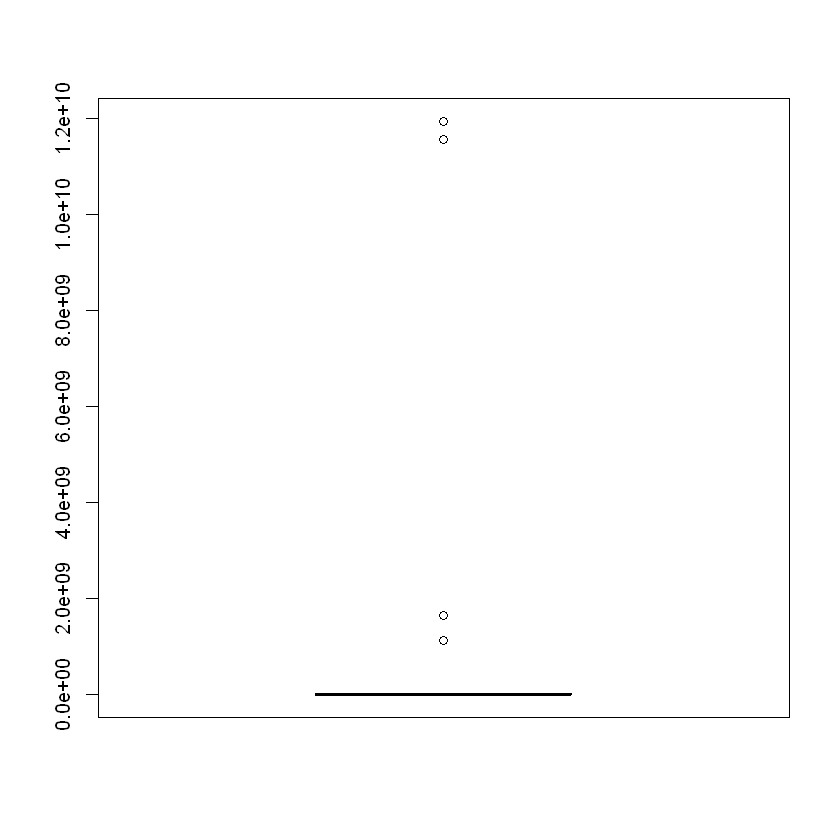

In [173]:
boxplot(dados$Salario)

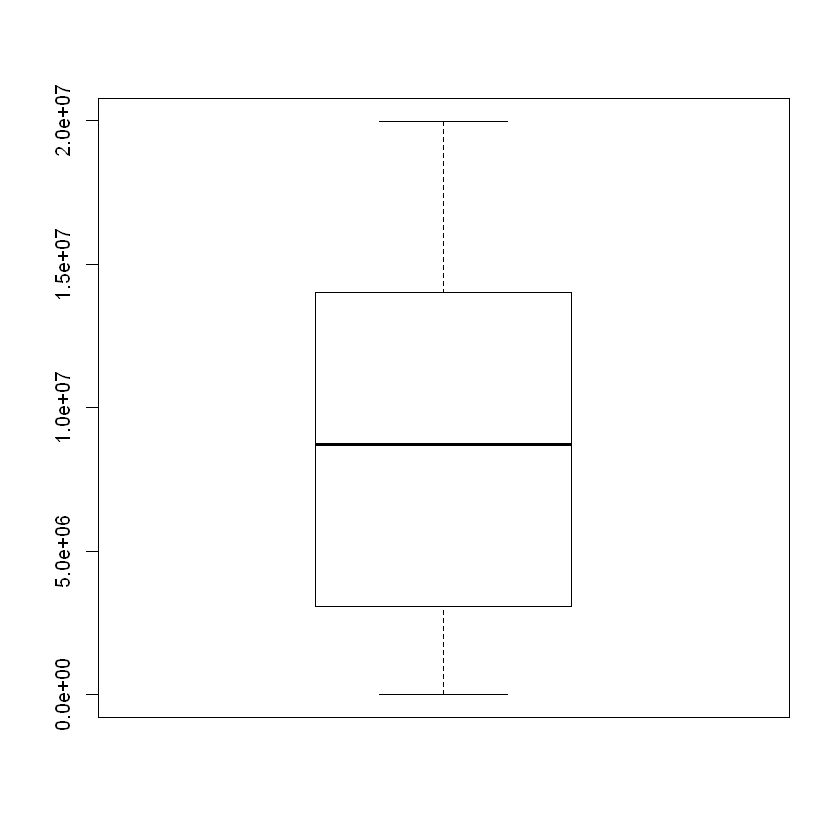

In [174]:
# Sem outliers
boxplot(dados$Salario, outline=F)

[1] 11934688000 11563829000  1640178900  1119811900

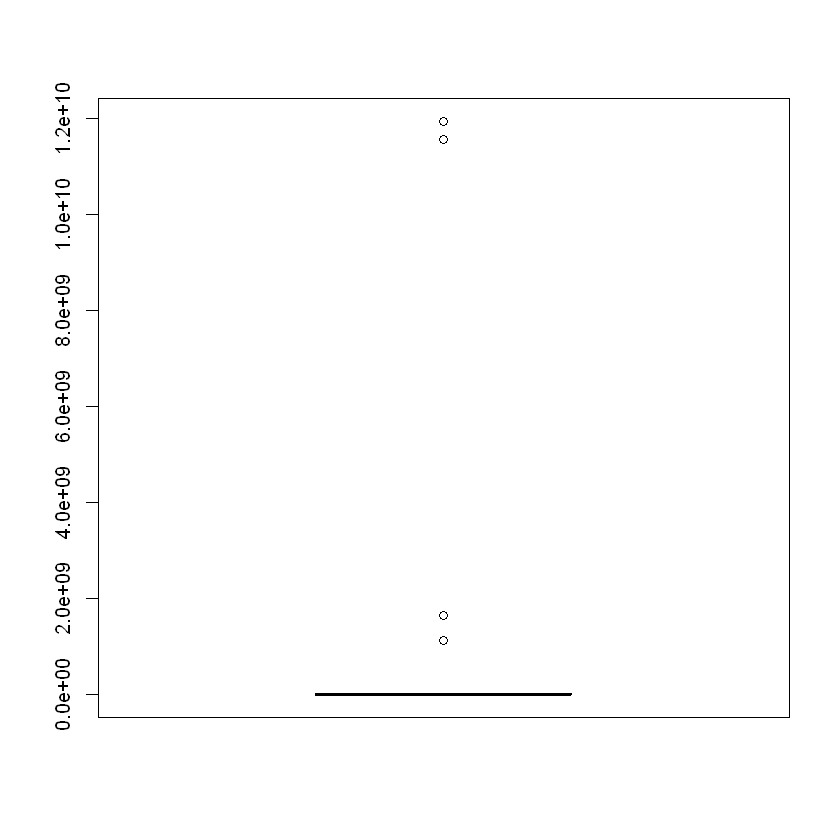

In [175]:
# Outra forma de exibir os outliers
x = boxplot(dados$Salario)$out
x

In [177]:
# Atualizando os autliers com a mediana
m = median(dados$Salario)
m

[1] 8703250

In [178]:
dados[dados$Salario >= 2*desv,]$Salario = m

In [180]:
dados[dados$Salario >= 2*desv,]$Salario

numeric(0)